# Binary Classification with a Tabular Credit Card Fraud Dataset

## Import Libraries

In [1]:


import sys
!{sys.executable} -m pip install numpy pandas matplotlib scikit-learn imbalanced-learn seaborn xgboost | grep -v 'already satisfied'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random



# Set various seeds:
# random.seed is required for reproducibly dropping
# values during the imputation stage
ourSeed = 42
random.seed(ourSeed)
np.random.seed(ourSeed)

# Clear the maximum number of columns to be displayed, so that all will be visible.
pd.set_option('display.max_columns', None)

'grep' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# 1. Explore Data

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219129 entries, 0 to 219128
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      219129 non-null  int64  
 1   Time    219129 non-null  float64
 2   V1      219129 non-null  float64
 3   V2      219129 non-null  float64
 4   V3      219129 non-null  float64
 5   V4      219129 non-null  float64
 6   V5      219129 non-null  float64
 7   V6      219129 non-null  float64
 8   V7      219129 non-null  float64
 9   V8      219129 non-null  float64
 10  V9      219129 non-null  float64
 11  V10     219129 non-null  float64
 12  V11     219129 non-null  float64
 13  V12     219129 non-null  float64
 14  V13     219129 non-null  float64
 15  V14     219129 non-null  float64
 16  V15     219129 non-null  float64
 17  V16     219129 non-null  float64
 18  V17     219129 non-null  float64
 19  V18     219129 non-null  float64
 20  V19     219129 non-null  float64
 21  V20     21

In [4]:
train.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,-1.070243,-0.234910,-1.099360,0.502467,0.169318,0.065688,-0.306957,-0.323800,0.103348,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,0.908773,0.836798,-0.056580,-0.120990,-0.144028,-0.039582,1.653057,-0.253599,-0.814354,0.716784,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,-0.818383,-0.376512,-0.226546,-0.552869,-0.886466,-0.180890,0.230286,0.590579,-0.321590,-0.433959,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,-0.007527,0.637441,0.676960,-1.504823,0.554039,-0.824356,-0.527267,-0.095838,-0.312519,0.642659,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,-0.097495,1.338869,1.391399,-0.128167,-0.081836,0.100548,-0.338937,0.090864,-0.423645,-0.731939,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


In [5]:
train.describe()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000
mean,109564.000000,62377.415376,0.096008,0.048345,0.592102,0.069273,-0.161555,0.133688,-0.128224,0.149534,-0.048337,-0.039758,0.153632,-0.061038,0.014330,0.067649,0.108643,0.013650,0.036815,-0.033927,-0.008302,0.009708,-0.031064,-0.050852,-0.050531,-0.002992,0.124005,0.009881,0.014034,0.017313,66.359803,0.002140
std,63257.237906,25620.348569,1.395425,1.159805,1.132884,1.253125,1.069530,1.202411,0.817207,0.716212,1.054143,0.821889,0.976946,0.998470,1.039145,0.801335,0.891613,0.786654,0.691709,0.784454,0.739928,0.439521,0.422777,0.597812,0.318175,0.593100,0.406741,0.473867,0.233355,0.164859,150.795017,0.046214
min,0.000000,0.000000,-29.807725,-44.247914,-19.722872,-5.263650,-37.591259,-25.659750,-31.179799,-28.903442,-8.756951,-22.092656,-4.190145,-16.180165,-4.373778,-15.585021,-4.155728,-11.778839,-20.756768,-7.456060,-4.281628,-18.679066,-14.689621,-8.748979,-11.958588,-2.836285,-3.958591,-1.858672,-9.234767,-4.551680,0.000000,0.000000
25%,54782.000000,47933.000000,-0.846135,-0.573728,-0.027154,-0.769256,-0.847346,-0.631835,-0.646730,-0.095948,-0.711444,-0.499563,-0.576969,-0.476890,-0.671601,-0.329905,-0.461596,-0.461077,-0.406675,-0.496990,-0.463035,-0.167927,-0.190418,-0.473099,-0.174478,-0.332540,-0.126080,-0.318330,-0.050983,-0.009512,5.990000,0.000000
50%,109564.000000,63189.000000,0.385913,0.046937,0.735895,0.064856,-0.229929,-0.087778,-0.098970,0.111219,-0.131323,-0.106034,0.090545,0.087649,-0.016837,0.049266,0.178975,0.054550,-0.013949,-0.039451,-0.002935,-0.037702,-0.042858,-0.032856,-0.063307,0.038708,0.145934,-0.086388,0.015905,0.022163,21.900000,0.000000
75%,164346.000000,77519.000000,1.190661,0.814145,1.306110,0.919353,0.356856,0.482388,0.385567,0.390976,0.583715,0.403967,0.917392,0.608480,0.695547,0.460837,0.791255,0.531777,0.410978,0.446448,0.455718,0.126750,0.109187,0.354910,0.060221,0.394566,0.402926,0.253869,0.076814,0.066987,68.930000,0.000000
max,219128.000000,120580.000000,2.430494,16.068473,6.145578,12.547997,34.581260,16.233967,39.824099,18.270586,13.423914,15.878405,9.417789,5.406614,5.976265,6.078453,4.693323,5.834992,8.845303,4.847887,4.090974,15.407839,22.062945,6.163541,12.734391,4.572739,3.111624,3.402344,13.123618,23.263746,7475.000000,1.000000


In [6]:
train = train.drop(columns=['id'])
test_id = test['id']
test = test.drop(columns=['id'])

In [7]:
corr_matrix = train.corr()

In [8]:
corr_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.020667,0.017150,-0.217963,-0.047875,0.125820,0.019394,0.048767,-0.012936,0.007998,0.013524,-0.099561,0.037317,0.005465,-0.048009,-0.071565,-0.025925,-0.042839,0.085157,0.007170,-0.024983,0.036436,0.084565,0.030906,-0.015779,-0.134160,-0.044146,-0.000651,-0.025088,-0.006316,0.006889
V1,0.020667,1.000000,-0.301975,-0.237078,0.060526,-0.102238,0.076384,-0.209567,-0.095881,0.102082,0.114961,0.073522,-0.092507,0.056030,-0.000759,0.019710,0.018332,-0.004016,0.007560,-0.018232,-0.174613,-0.075561,-0.020109,-0.050983,-0.039148,0.256438,-0.000983,-0.001242,0.042269,-0.115158,-0.039251
V2,0.017150,-0.301975,1.000000,0.038095,0.146428,0.243717,-0.082277,0.292088,0.034800,0.010921,-0.105533,-0.007099,0.048717,0.054918,0.081159,0.080777,0.075279,-0.034897,0.017427,0.038556,-0.128416,-0.078165,-0.032399,0.022669,0.004399,-0.150464,-0.038489,0.057503,0.008125,-0.563721,0.012451
V3,-0.217963,-0.237078,0.038095,1.000000,0.058966,-0.215220,-0.130293,0.052614,-0.026637,-0.029154,-0.081315,-0.012618,0.083470,-0.082625,-0.092912,-0.106933,-0.111424,-0.045109,-0.076929,-0.017437,-0.035145,0.025458,0.156739,-0.030509,-0.008280,-0.153387,0.010866,0.049136,0.011003,-0.141140,-0.054008
V4,-0.047875,0.060526,0.146428,0.058966,1.000000,0.004642,-0.011888,0.096579,-0.002872,0.142303,-0.049087,-0.018310,0.132845,-0.043519,0.040658,-0.082493,-0.082537,0.064531,0.007153,-0.051216,0.020741,0.047631,0.054381,-0.008109,-0.048903,0.034450,-0.065007,-0.002757,0.021489,0.061920,0.027977
V5,0.125820,-0.102238,0.243717,-0.215220,0.004642,1.000000,0.331088,0.259276,0.051261,-0.000294,-0.179417,-0.016988,-0.053468,0.088330,0.057963,0.087929,0.095218,-0.191689,0.015377,0.051693,0.003181,-0.054922,-0.104722,-0.027975,0.047332,-0.007738,-0.048584,0.020277,-0.035526,-0.313477,0.010144
V6,0.019394,0.076384,-0.082277,-0.130293,-0.011888,0.331088,1.000000,-0.232957,0.274289,0.062514,0.006257,-0.057018,0.063181,-0.022692,-0.017279,-0.020519,0.005957,-0.106143,0.003907,0.091555,0.050650,0.009065,-0.015250,-0.027498,0.076797,0.103363,0.001758,0.018537,0.007954,0.076731,-0.004217
V7,0.048767,-0.209567,0.292088,0.052614,0.096579,0.259276,-0.232957,1.000000,-0.136652,-0.043469,-0.183903,0.001209,0.016123,0.043617,0.046692,0.047968,-0.041957,-0.126887,-0.035152,-0.005533,0.151273,-0.013802,-0.080196,-0.047698,-0.011064,-0.135634,-0.032033,-0.034344,0.016396,0.186247,-0.024589
V8,-0.012936,-0.095881,0.034800,-0.026637,-0.002872,0.051261,0.274289,-0.136652,1.000000,0.009300,-0.033509,-0.019785,0.093553,-0.094678,0.024361,-0.022854,0.031335,0.015503,0.009833,0.032125,-0.046418,0.005931,0.020232,0.017078,0.035852,-0.020029,0.011455,0.028751,0.011465,-0.080585,-0.037774
V9,0.007998,0.102082,0.010921,-0.029154,0.142303,-0.000294,0.062514,-0.043469,0.009300,1.000000,-0.335805,0.018908,-0.133194,0.049560,0.162879,-0.164841,-0.033894,0.019246,-0.003942,0.011800,0.040775,-0.011654,0.052760,0.013649,-0.007573,0.014042,0.078406,0.008854,-0.053040,-0.022752,0.015108


In [9]:
high_corr = corr_matrix[abs(corr_matrix) >= 0.3]

# Print the resulting matrix of high correlations
print(high_corr)


        Time        V1        V2   V3   V4        V5        V6   V7   V8  \
Time     1.0       NaN       NaN  NaN  NaN       NaN       NaN  NaN  NaN   
V1       NaN  1.000000 -0.301975  NaN  NaN       NaN       NaN  NaN  NaN   
V2       NaN -0.301975  1.000000  NaN  NaN       NaN       NaN  NaN  NaN   
V3       NaN       NaN       NaN  1.0  NaN       NaN       NaN  NaN  NaN   
V4       NaN       NaN       NaN  NaN  1.0       NaN       NaN  NaN  NaN   
V5       NaN       NaN       NaN  NaN  NaN  1.000000  0.331088  NaN  NaN   
V6       NaN       NaN       NaN  NaN  NaN  0.331088  1.000000  NaN  NaN   
V7       NaN       NaN       NaN  NaN  NaN       NaN       NaN  1.0  NaN   
V8       NaN       NaN       NaN  NaN  NaN       NaN       NaN  NaN  1.0   
V9       NaN       NaN       NaN  NaN  NaN       NaN       NaN  NaN  NaN   
V10      NaN       NaN       NaN  NaN  NaN       NaN       NaN  NaN  NaN   
V11      NaN       NaN       NaN  NaN  NaN       NaN       NaN  NaN  NaN   
V12      NaN

<AxesSubplot:>

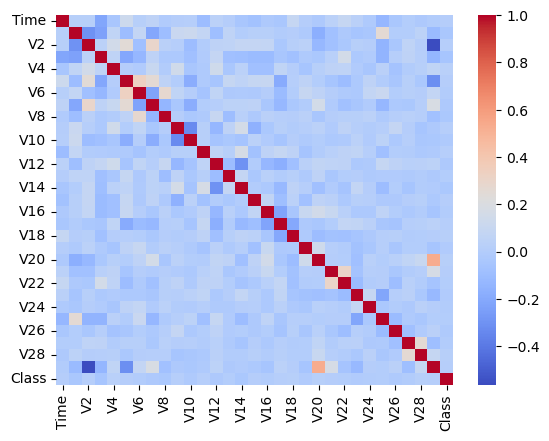

In [10]:
sns.heatmap(corr_matrix,annot=False,  cmap='coolwarm')

## Tracking Frauds over Time

Note that in the following section, we restrict the focus to the training set to avoid influencing the model building stage.

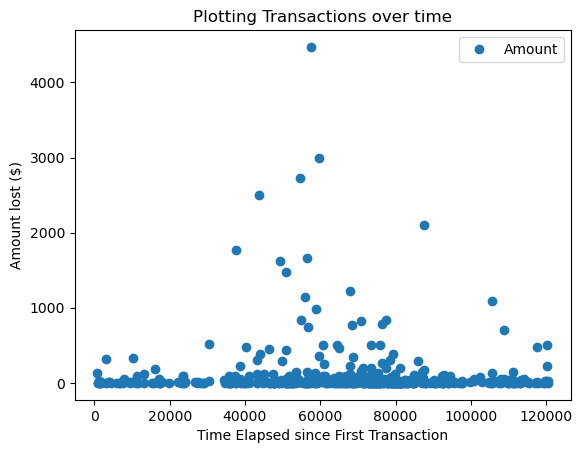

In [11]:

# define the fraudulent transactions
fraud_rows = train[train['Class'] == 1]

# plot frauds against time
# TODO: change time axis instead of secs elapsed since 1st transaction: days / weeks?
fraud_rows.plot(x = 'Time', y = 'Amount', style = 'o')
plt.xlabel("Time Elapsed since First Transaction")
plt.ylabel("Amount lost ($)")
plt.title("Plotting Transactions over time")
plt.show()

No obvious correlation between time and frauds: possibly a triangular / parabolic shape with peak in the middle, but hard to infer too much from this: we require more tinkering.

Here is a function to split the Time into day, hour, minute etc. The client will be required to provide the correct offset to generate real insights from this (when exactly time 0 corresponds to).

In [12]:
# use a dictionary instead of an Enum
# because we have duplicate values (60)
# which is not possible in an Enum
# (every value must be distinct,
# or else their keys are considered the same)
Times = {
    'SEC_IN_MIN': 60,
    'MIN_IN_HOUR': 60,
    'HOUR_IN_DAY': 24,
    'DAY_IN_WEEK': 7,
}

def Make_Time(seconds_elapsed, offset = 0):
    """
    Input:  - seconds_elapsed (int)
              the total number of seconds to convert to time
            - offset (int)
              the seconds that have passed between Monday 00:00
              and the first transaction
              month and year calculations are currently
              outside the program's scope
    Output: - Day of week (int)
            - Hour of day (int)
            - Minute of hour (int)
            - Second of minute (int)

    The function is vectorised to work on numpy arrays,
    so can be used as part of a sklearn pipeline
    without using fixed loops (and the induced 
    performance reduction that brings).
    """
    SECS_IN_WEEK = np.prod([ Times[x] for x in Times ])
    
    # Set the initial values
    divisor = SECS_IN_WEEK
    currentTime = np.divmod(seconds_elapsed + offset, divisor)[1]
    outVal = []

    # "recursive" solution
    # Use modular arithmetic to obtain the quotient and remainder
    # from dividing the total seconds by number of seconds in
    # the time unit being considered (minute, hour etc.)
    # the quotient gives the new total to be divided;
    # the remainder gives the amount of that time unit
    for factor in reversed(Times):
        divisor /= Times[factor]
        noTimeUnit, currentTime = np.divmod(currentTime, divisor)
        outVal.append(noTimeUnit)
    
    # this function is vectorised:
    # for performance enhancement, instead of using loops
    # we use vectorised functions native to numpy
    return np.array([ x for x in outVal ], dtype = int).transpose()

We can call this to translate the time axis in the previous graph to a human-readable time format.

In [13]:

# draw a plot to show all transactions over time
# use red dots for frauds, blue dots for non-frauds
# train['Class'].plot(x = 'Time', y = 'Amount', style = 'o')
time_df = Make_Time(train['Time'])
time_df = pd.DataFrame(time_df, columns = ['Day', 'Hour', 'Minute', 'Second'])
time_df.head()

TypeError: 'dict' object is not reversible

In [ ]:

time_df.nunique()
     

Day        2
Hour      24
Minute    60
Second    60
dtype: int64

This illustrates that our train set is comprised of data collected over two days.

We can infer these are consecutive days, due to the distribution / histogram of the "fraud over time" graph above: the time axis is continuous.

In [ ]:

temp_train_with_time = pd.concat([train, time_df], axis = 1)
temp_train_with_time.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Day,Hour,Minute,Second
0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,-1.070243,-0.234910,-1.099360,0.502467,0.169318,0.065688,-0.306957,-0.323800,0.103348,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0,0,0,0,0
1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,0.908773,0.836798,-0.056580,-0.120990,-0.144028,-0.039582,1.653057,-0.253599,-0.814354,0.716784,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0,0,0,0,0
2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,-0.818383,-0.376512,-0.226546,-0.552869,-0.886466,-0.180890,0.230286,0.590579,-0.321590,-0.433959,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0,0,0,0,0
3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,-0.007527,0.637441,0.676960,-1.504823,0.554039,-0.824356,-0.527267,-0.095838,-0.312519,0.642659,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0,0,0,0,0
4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,-0.097495,1.338869,1.391399,-0.128167,-0.081836,0.100548,-0.338937,0.090864,-0.423645,-0.731939,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0,0,0,0,0


To give a baseline result, plot the graph of transactions over time. This includes both fraud and non-fraud transactions.

Note that given the class imbalance, more non-fraud transactions will contribute to this graph, so we'd expect this graph to be similar to the one considering solely of non-fraud transactions with respect to general trends etc.

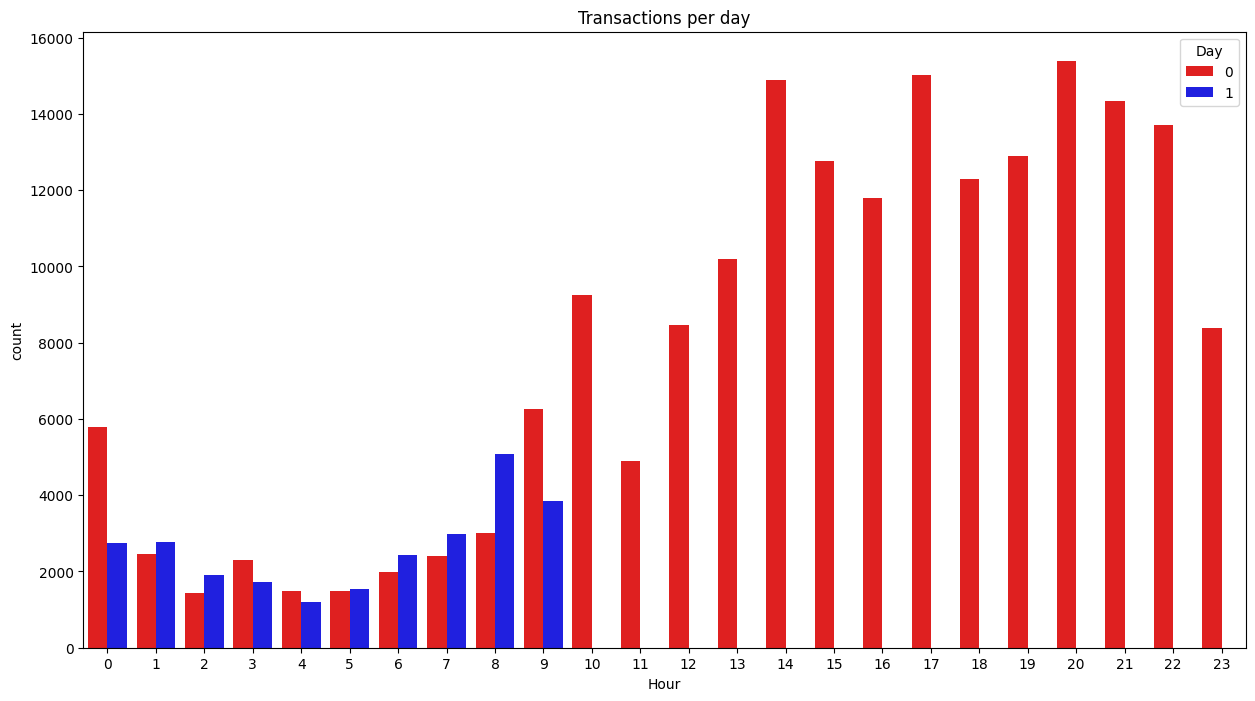

In [ ]:

# All transactions graph
plt.figure(figsize=(15, 8))
plt.ylabel('Number of Transactions')
plt.title('Transactions per day')

# sns.histplot(
#     multiple = 'dodge',
sns.countplot(
    data = temp_train_with_time,
    palette = ['red',"blue"],
    x = 'Hour',
    hue = 'Day',
)

plt.show()

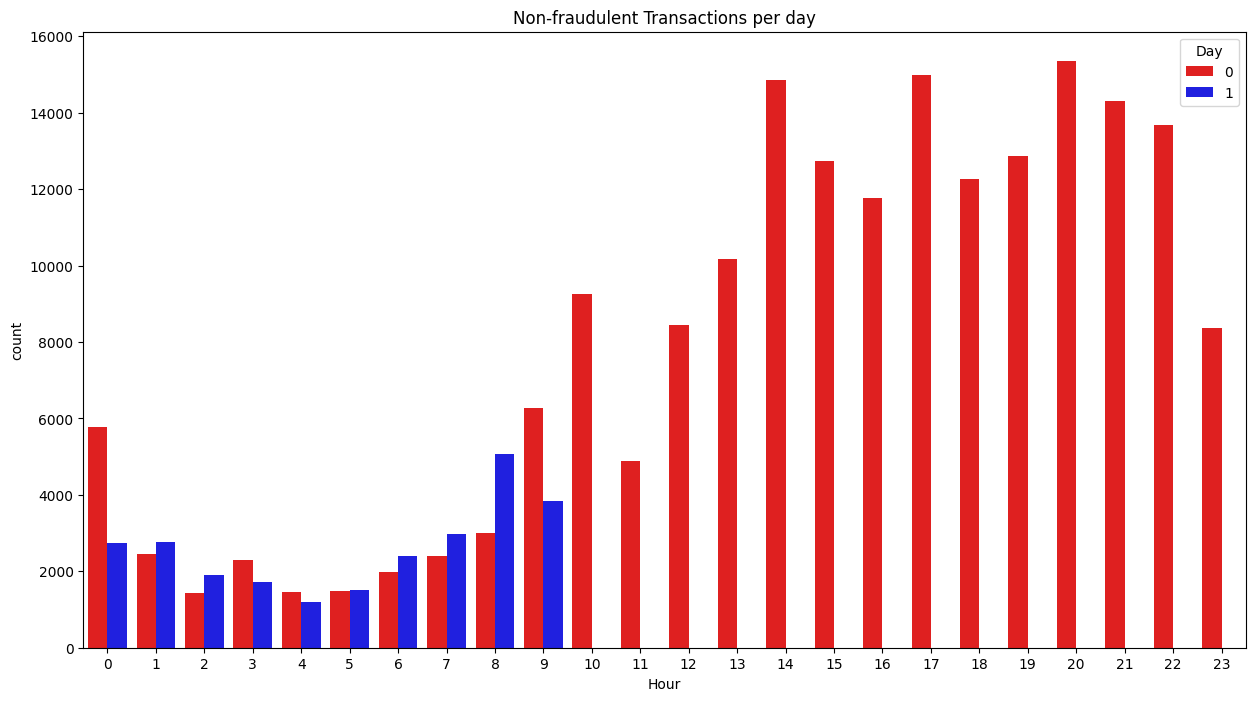

In [ ]:

# Non-fraud graph
plt.figure(figsize=(15, 8))
plt.ylabel('Number of Transactions')
plt.title('Non-fraudulent Transactions per day')

# sns.histplot(
#     multiple = 'dodge',
#     kde = True,
sns.countplot(
    data = temp_train_with_time.query('Class == 0'),
    palette = ['red',"blue"],
    x = 'Hour',
    hue = 'Day',
)

plt.show()

We observe the same general trend as expected.

It appears the activity is low during the low hours (giving credence to the theory that the time 0 (0 seconds elapsed since first transaction in dataset) matches to midnight on some day -- this would correspond to the early hours of the morning if so).

It then spikes from the 9 and 10 hours and generally rises from there on, naturally falling from the 20 hour.

This follows a roughly sinusoidal shape, and the rough periodic pattern appears to hold in the second day too.

We now isolate the fraudulent transactions and plot a similar graph.

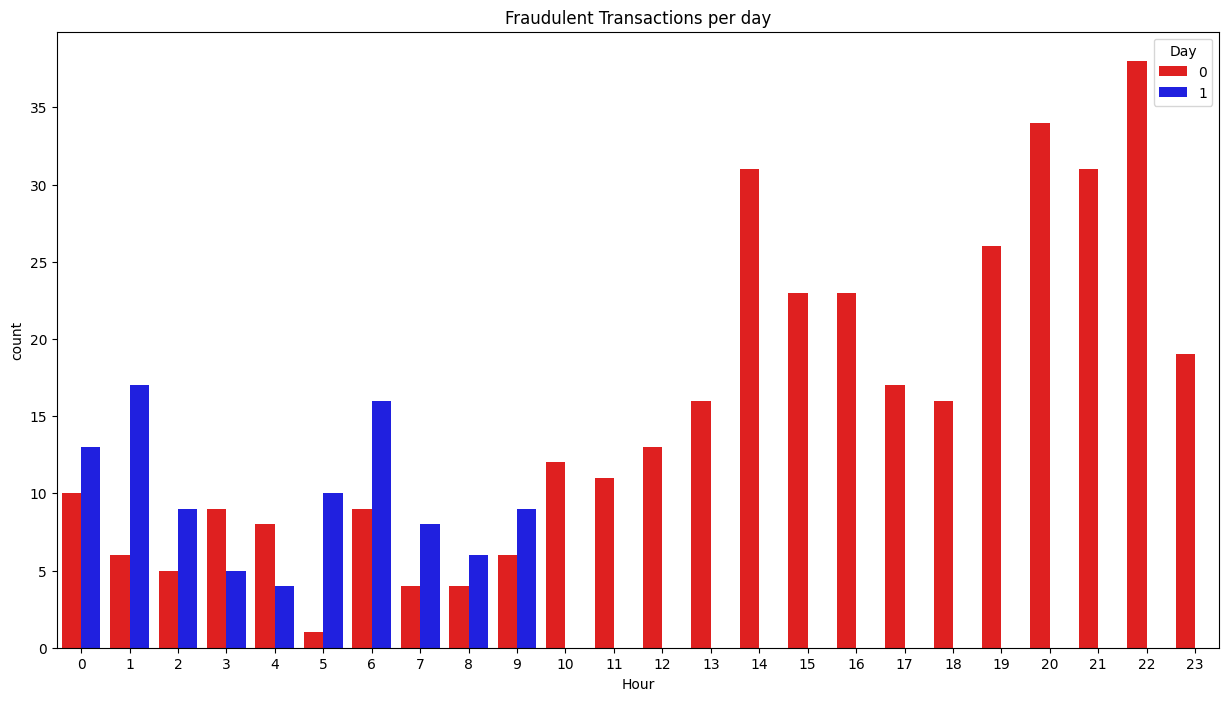

In [ ]:

# Fraud graph
plt.figure(figsize=(15, 8))
plt.ylabel('Number of Transactions')
plt.title('Fraudulent Transactions per day')

# sns.histplot(
#     multiple = 'dodge',
#     kde = True,
sns.countplot(
    data = temp_train_with_time.query('Class == 1'),
    palette = ['red',"blue"],
    x = 'Hour',
    hue = 'Day',
)
plt.show()

Interestingly, this doesn't appear to follow the same trends as before. There is no nice discernible pattern, or similar behaviour between the days.

We could say roughly more frauds appear to occur between 14 -- 22 hours, a slightly delayed (1-2 hour difference) window compared to the non-fraud graph.

We notice more frauds occurring at the 0, 1 and 6 hours on Day 2, but without further data are unable to verify any correlations here.

On this basis, it appears periods of high fraud activity are similar to those for transaction activity in general from the day 1 data. However, from comparing the 0 -- 10 hour data, we can conjecture that fraud activity does not follow any predominant periodic trends and may be unexplainable in this way.

It would be interesting to get more data with a larger spread of days (longer time frame) to get a feel for how things pan out over time.

## Demonstration of Class Imbalance

How many fraudulent transactions occur?

In [ ]:

# proportion of fraudulent transactions
num_fraud = len(fraud_rows.index)
total_transactions = len(train.index)
prop_fraud = num_fraud / total_transactions
print(f"Overall, out of {total_transactions} transactions, \
{np.round(prop_fraud * 100, 2)}% \
are fraudulent.")

Overall, out of 219129 transactions, 0.21% are fraudulent.


This could be a problem: we don't have many fraudulent transactions, so the model won't be able to learn as well.

Unlike in the previous coursework, where it was possible to discard cars past a certain price, and reduce the scope of the model to pricing cars below a threshold, we can't do the same for this binary classification scenario.

Instead, we will use undersampling and oversampling techniques to obtain more correlations hidden in the data.

As an aside: what is the average amount lost?

In [ ]:
# average amount lost
mean_amount = fraud_rows['Amount'].mean()
mean_amount = np.round(mean_amount, 2)
print(f"On average, customers lost €{mean_amount}. \
This amounted to a total of €{fraud_rows['Amount'].sum()} lost overall.")

On average, customers lost €108.39. This amounted to a total of €50835.38 lost overall.


## Outliers, and why they present a problem

As shown by the above, we are presented with a highly class imbalanced dataset.

Analysing the histogram plot distributions of each feature shows the presence of outliers. This disrupts our ability to, for instance, scale the features to work nicely with distance algorithms such as K-nearest neighbours and regression techniques which are scale-sensitive and perform much worse when the data is not on a uniform scale.

The following demonstrates why we cannot simply discard the outlier data.

First: we demonstrate again the presence of outliers by drawing the boxplots.

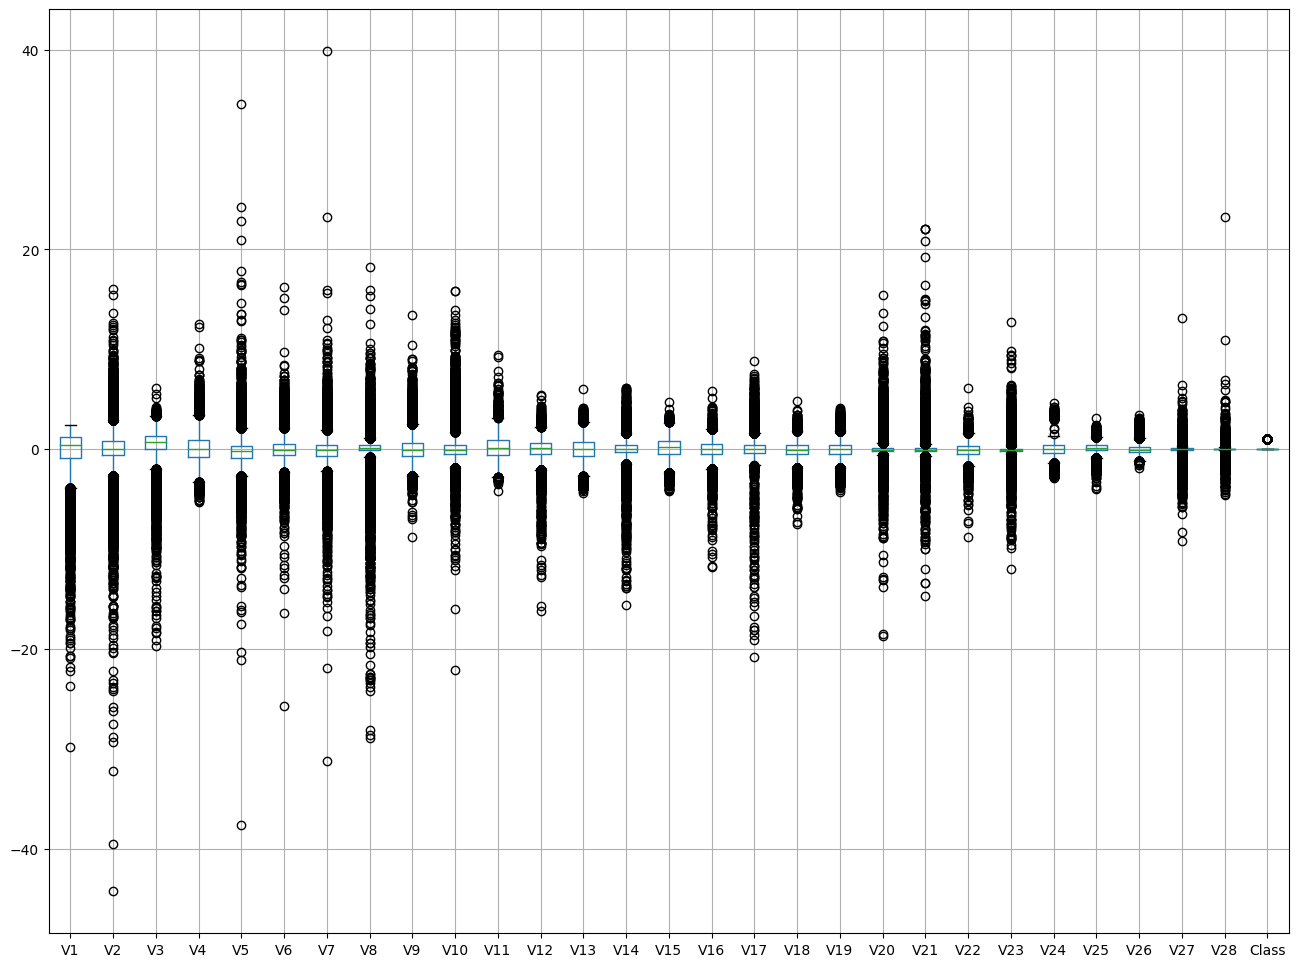

In [ ]:

train.drop(columns = ['Time', 'Amount']).boxplot(figsize = (16, 12))
plt.show()

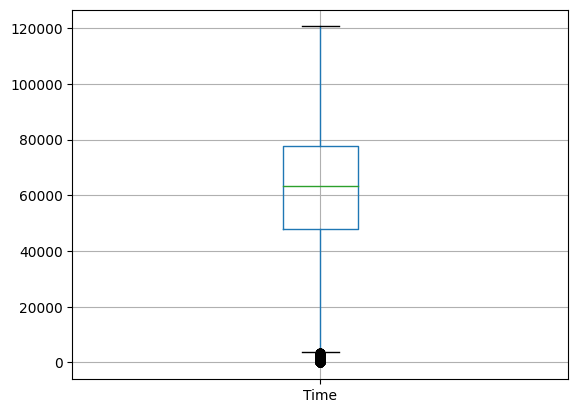

In [ ]:
train[['Time']].boxplot()
plt.show()

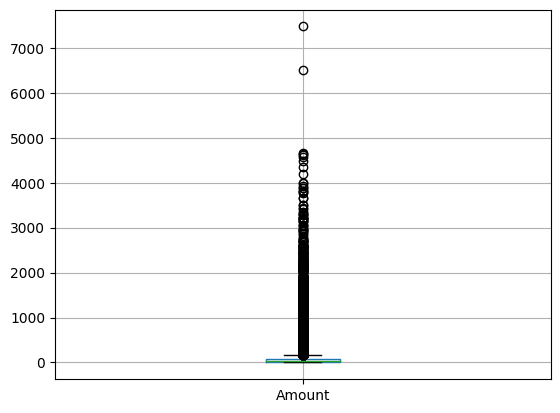

In [ ]:
train[['Amount']].boxplot()
plt.show()    

The box incorporates the first (Q1) to third (Q3) quartile data of each feature. This is where we'd expect 50% of our data to lie.

The "whiskers", or horizontal lines demonstrate the so-called "minimum" and "maximum" points excluding outliers, evenly spaced from Q1 and Q3 respectively as Q1 and Q3 are to the median (middle).

The points outside these boxes are all IQR "outliers" beyond the expected boundaries of our data. Visually, it is apparent the data contains many outliers.

We investigate the effect of removing all these outliers from each feature.

In [ ]:
from collections import Counter

# https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset
# Adapted from this Kaggle notebook
def Remove_IQR_Outliers(
    df,
    min_outliers = 2,
    features = None
):
    """
    This function follows Tukey's (1977) method,
    published in his seminal book "Exploratory Data Analysis",
    to remove outliers,
    or points outwith the Q0 and Q100 quartiles.
    """
    # https://stackoverflow.com/questions/21804615/
    # Compute which features to consider for outlier removal
    # since Python doesn't directly support function default parameters
    # referring to other default parameters,
    # unlike R,
    # so need this workaround
    if features is None:
        features = df.select_dtypes(include = [np.number])
    
    # Store all outliers
    outlierList = []
    
    for col in features:
        # 1st quartile encompassing 25% of the data
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile encompassing 75% of the data
        Q3 = np.percentile(df[col], 75)
        
        # Calculate Interquartile range (IQR)
        # measuring distance between Q1 and Q3
        IQR = Q3 - Q1
        
        # Determine the outliers: anything outwith
        # 1.5 times the IQR
        # Magic number 1.5 comes from Tukey 1977
        outlierThresh = 1.5 * IQR
        
        # Remove all outliers from the column:
        # Smaller than Q1 or larger than Q3 by our threshold
        outlierIndex = df[(df[col] < Q1 - outlierThresh) | (df[col] > Q3 + outlierThresh)].index
        outlierList.extend(outlierIndex)
        
    # Filter the features containing more than `min_outliers` outliers
    outlierList = Counter(outlierList)
    enoughOutliers = list( k for (k, v) in outlierList.items() if v >= min_outliers)
    
    return enoughOutliers
     


In [ ]:
# Obtain the outliers
outliers_IQR = Remove_IQR_Outliers(train.drop(columns = ['Time', 'Class']))

# outliers_IQR

# Drop the outliers from the dataset
temp_train_remove_outliers = train.drop(labels = outliers_IQR)
temp_train_remove_outliers.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,-1.070243,-0.234910,-1.099360,0.502467,0.169318,0.065688,-0.306957,-0.323800,0.103348,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,0.908773,0.836798,-0.056580,-0.120990,-0.144028,-0.039582,1.653057,-0.253599,-0.814354,0.716784,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,-0.818383,-0.376512,-0.226546,-0.552869,-0.886466,-0.180890,0.230286,0.590579,-0.321590,-0.433959,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,-0.007527,0.637441,0.676960,-1.504823,0.554039,-0.824356,-0.527267,-0.095838,-0.312519,0.642659,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,-0.097495,1.338869,1.391399,-0.128167,-0.081836,0.100548,-0.338937,0.090864,-0.423645,-0.731939,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


In [ ]:

# Determine the number of frauds remaining
remainFraud = temp_train_remove_outliers[temp_train_remove_outliers['Class'] == 1]['Class'].sum()
totalFraud = train[train['Class'] == 1]['Class'].sum()

print(f"""
      After performing outlier removal via the IQR method,
      we are left with {remainFraud} out of our {totalFraud} frauds,
      i.e. {np.round(100 * remainFraud / totalFraud, 2)}% of them remain
      and {100 - np.round(100 * remainFraud / totalFraud, 2)}% are removed.
      
      This accounts for {np.round(100 * remainFraud / len(train.index), 2)}% of all transactions in total.
      
      In the dataset obtained from removing outliers,
      {np.round(100 * remainFraud / len(temp_train_remove_outliers.index), 2)}% are frauds.
      """)
     


      After performing outlier removal via the IQR method,
      we are left with 188 out of our 469 frauds,
      i.e. 40.09% of them remain
      and 59.91% are removed.
      
      This accounts for 0.09% of all transactions in total.
      
      In the dataset obtained from removing outliers,
      0.11% are frauds.
      


Given our dataset was so imbalanced before, and our proportion of fraud:non-fraud transactions has increased, i.e. exacerbating the issue of class imbalance, we conclude that we cannot afford to drop these rows containing outliers.

## Oversampling with SMOTE

This effectively oversamples the minority class
by generating new examples in an effort to rebalance the class distribution / imbalance problem.

In [14]:
from imblearn.over_sampling import SMOTE

# Separate the features and target variable
X = train.drop('Class', axis=1)
y = train['Class']

# Apply SMOTE oversampling to the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution of the resampled data
print(y_resampled.value_counts())

train_resampled = pd.DataFrame(X_resampled, columns=X.columns)

0    218660
1    218660
Name: Class, dtype: int64


# 2. Perform any further data cleaning as necessary

## Data Cleaning (Standardisation)

Although tree-based methods do not require scaling (Lecture 14 Slide 24, Advantages of tree models), KNN is a distance-based algorithm so does benefit from scaling.

Principal Component Analysis, or PCA, dimension-reduction was conducted on the data. This requires the data to be centred before applying the algorithm. The output should also be scaled -- we observe the data appears to have been standard-normalised, with mean 0 and standard deviation 1.

Hence, we leave the data as-is but scale the `time` and `amount` features.

Remember to "unscale" the `Amount` column at the end if you want to use RMSE in evaluation: to compare "units to units". This doesn't apply to us, because we're using classification instead of regression. So our predicted value is a class, not a value such as monetary amount. The RMSE in this instance has no interpretable meaning, and is just a number in which a smaller value implies a better model.

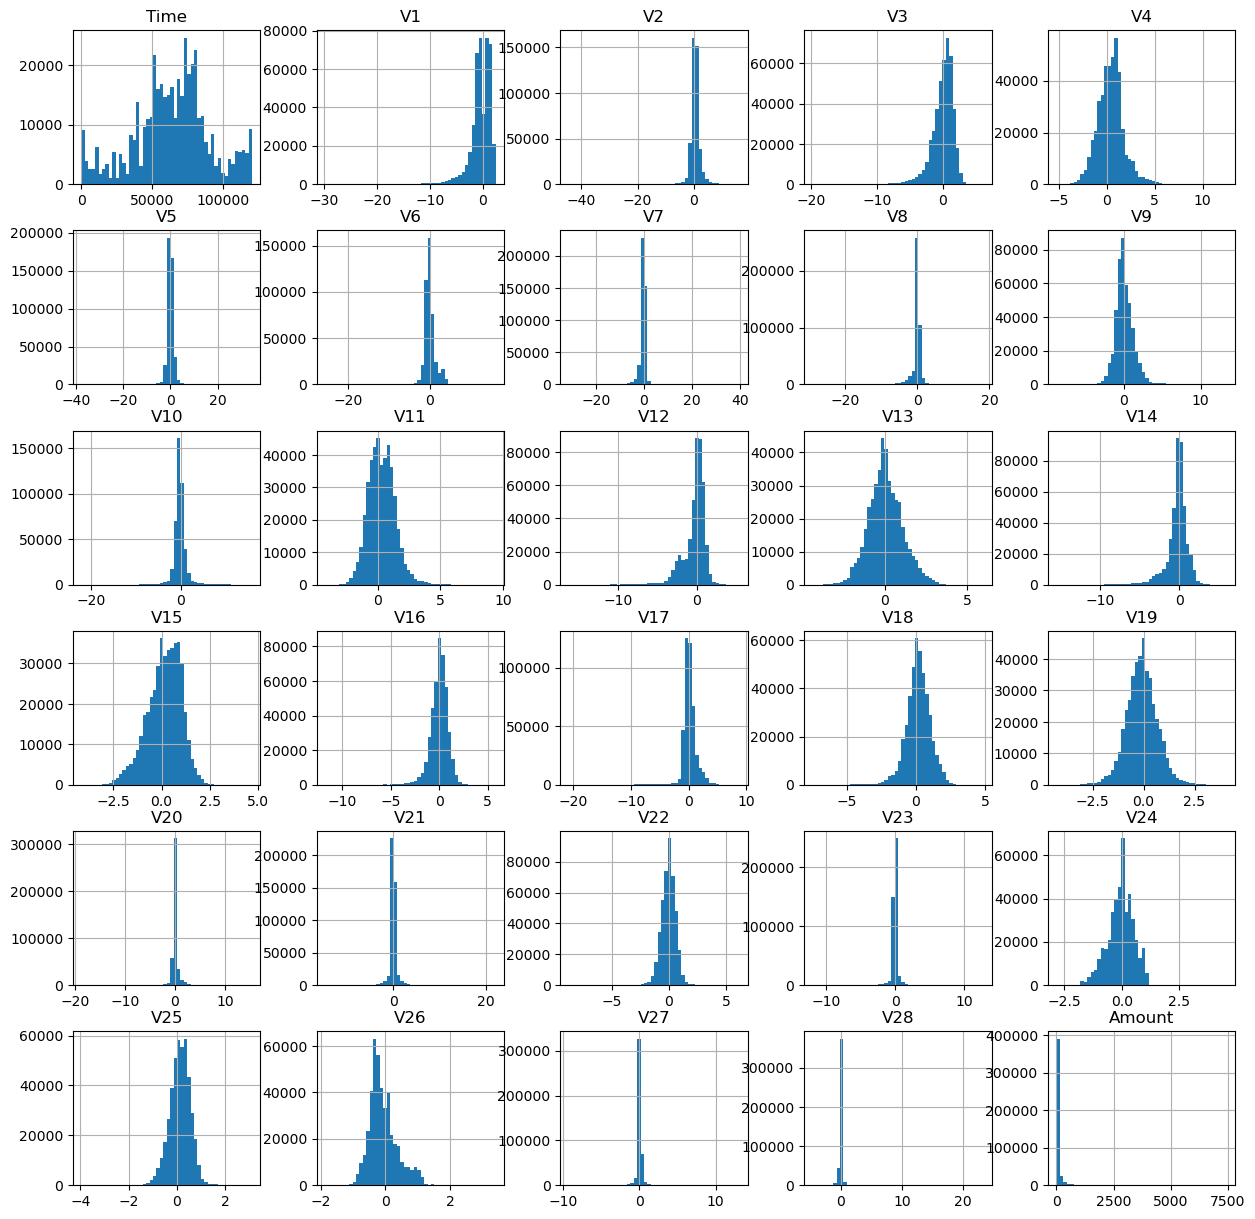

In [15]:
train_resampled.hist(bins=50, figsize=(15,15))
plt.show()

## Scale `Time`

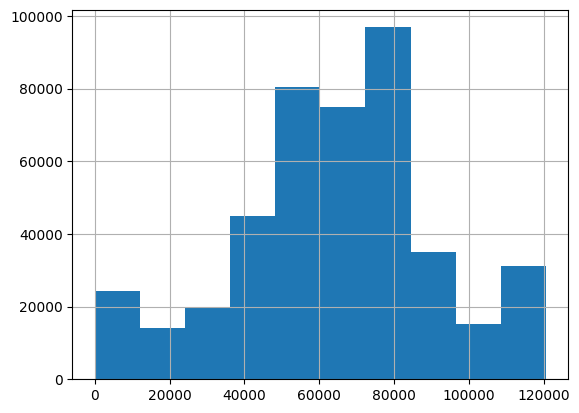

In [ ]:
# view histogram of `time` first
# to look for tails
train_resampled["Time"].hist()
plt.show()

No tails observed here, and the data looks fairly symmetrical, so scale without transforming (Geron Chap. 2, "Feature Scaling and Transformation")

## Scaled `Amount`

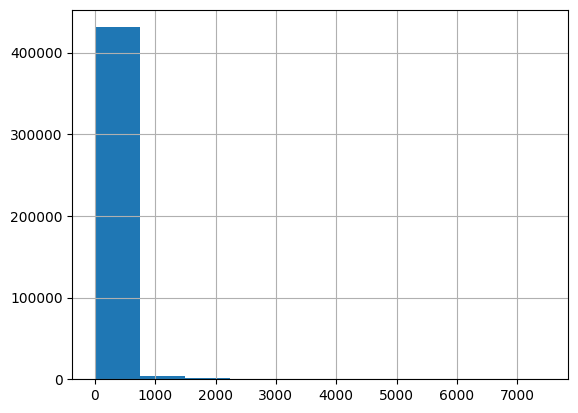

In [ ]:
train_resampled["Amount"].hist()
plt.show()

Long right-tail observed here, so apply a log transform before scaling.

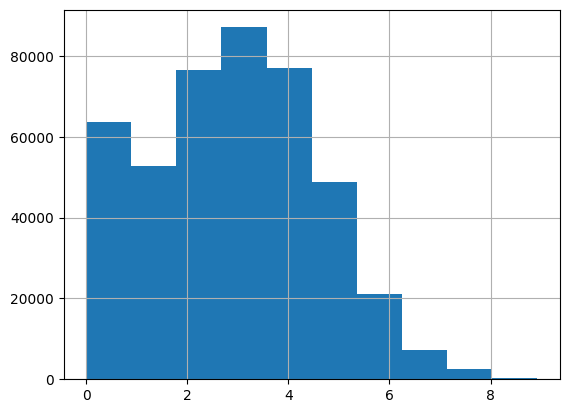

In [ ]:
# Use `np.log1p` instead of `np.log`
# because we require the log argument `x + 1`,
# i.e. np.log(x + 1)
# since we have x == 0 in our data set
# this is given automatically by `np.log1p`
np.log1p(train_resampled['Amount']).hist()
plt.show()

## Apply scaling

In [16]:
from sklearn.preprocessing import StandardScaler
 
std_scaler = StandardScaler()

train_resampled['Time'] = std_scaler.fit_transform(train_resampled['Time'].values.reshape(-1, 1))
train_resampled['Amount'] = std_scaler.fit_transform(np.log1p(train_resampled['Amount']).values.reshape(-1, 1))

train_resampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-2.40409,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,-1.070243,-0.234910,-1.099360,0.502467,0.169318,0.065688,-0.306957,-0.323800,0.103348,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,-1.153605
1,-2.40409,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,0.908773,0.836798,-0.056580,-0.120990,-0.144028,-0.039582,1.653057,-0.253599,-0.814354,0.716784,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,0.926977
2,-2.40409,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,-0.818383,-0.376512,-0.226546,-0.552869,-0.886466,-0.180890,0.230286,0.590579,-0.321590,-0.433959,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,-1.020909
3,-2.40409,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,-0.007527,0.637441,0.676960,-1.504823,0.554039,-0.824356,-0.527267,-0.095838,-0.312519,0.642659,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,-1.401219
4,-2.40409,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,-0.097495,1.338869,1.391399,-0.128167,-0.081836,0.100548,-0.338937,0.090864,-0.423645,-0.731939,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,-1.401219


Apply this scaling to the test set too for Kaggle upload.

In [17]:
test_scaled = test.copy()
test_scaled['Time'] = std_scaler.fit_transform(test_scaled['Time'].values.reshape(-1, 1))
test_scaled['Amount'] = std_scaler.fit_transform(np.log1p(test_scaled['Amount']).values.reshape(-1, 1))

test_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.687331,2.115519,-0.691809,-1.305514,-0.685655,-0.641265,-0.764784,-0.924262,-0.023030,-0.230126,0.220610,1.058325,-0.723363,-0.619241,-2.243711,-0.271429,2.007845,1.213534,0.282344,0.579121,0.067367,0.241708,0.682524,0.037769,-0.546859,-0.123055,-0.084889,0.004720,-0.021944,0.233933
1,-1.687331,1.743525,-1.681429,-0.547387,-1.061113,-0.695825,2.458824,-1.632859,1.073529,1.068183,0.483337,0.274519,-0.346514,-0.409519,-0.564673,-0.143855,1.334855,0.160901,-0.087356,-0.066264,0.441788,0.543278,1.294571,0.309541,3.703925,-0.242579,0.068708,0.002629,0.064690,1.304925
2,-1.687331,2.205568,-1.571445,-0.238965,-1.662517,-1.652324,-0.054701,-1.682064,0.105613,-1.177858,1.626352,0.601148,-0.041610,0.432748,-0.527684,-0.543665,0.043896,0.058472,0.622667,0.010671,-0.366906,-0.131527,0.086623,0.291375,0.739087,-0.543006,-0.297813,0.043699,-0.037855,-0.150193
3,-1.687331,1.989728,-0.972909,-1.938259,-1.440129,-0.166855,-0.794048,0.252889,-0.399789,2.079398,-1.225592,-0.869368,1.647638,1.138026,-0.258468,-0.361765,-1.253326,0.099479,-0.587702,1.207085,-0.049136,-0.080115,-0.010732,-0.038550,0.656830,0.343470,-0.627529,-0.024338,-0.036143,1.113200
4,-1.687331,-1.943548,-1.668761,0.363601,-0.977610,2.684779,-2.037681,0.039709,-0.048895,-0.281749,-0.341879,0.471628,0.637604,-0.592416,0.331702,-1.451799,0.096467,-0.853439,-0.462060,-0.267098,0.391627,0.083389,-0.306918,0.247822,-0.391799,-0.790716,-0.025706,0.330758,0.335537,-1.266545


# 3. Imputation methods

### Dropping 10% of inputs from each column

In [18]:
# Create a train set with missing values
# - create a random dataframe of same dimension
#   as our train set holding boolean values,
#   then drop the corresponding cells with True
#   in the train set

# Delete 10% of data in each column
bool_df = np.random.choice([True, False], size=train_resampled.shape, p=[0.1, 0.9])
data_nan = train_resampled.mask(bool_df)
# data_nan = cleaned_train.iloc[:, :-1].mask(np.random.choice([True,False],size=train.iloc[:, :-1].shape,p=[0.1,0.9]))
#merge the last column
# data_nan = pd.concat([data_nan,train_resampled.iloc[:, -1]],axis=1)

In [19]:
data_nan

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-2.404090,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,-1.070243,-0.234910,-1.099360,0.502467,0.169318,0.065688,-0.306957,-0.323800,0.103348,-0.292969,-0.334701,-0.887840,NaN,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,-1.153605
1,-2.404090,1.998827,NaN,-0.520969,-0.894539,-1.122528,NaN,NaN,0.050198,-0.109948,0.908773,0.836798,-0.056580,-0.120990,-0.144028,-0.039582,1.653057,-0.253599,-0.814354,0.716784,0.065717,0.054848,-0.038367,0.133518,NaN,-0.465491,-0.464655,-0.009413,-0.038238,NaN
2,-2.404090,0.091535,NaN,-0.223445,-0.435249,NaN,-0.988351,0.948146,-0.084789,-0.042027,-0.818383,-0.376512,-0.226546,-0.552869,-0.886466,-0.180890,0.230286,0.590579,-0.321590,-0.433959,-0.021375,-0.326725,-0.803736,NaN,0.951233,-0.506919,0.085046,0.224458,0.087356,-1.020909
3,-2.404090,1.979649,-0.184949,-1.064206,NaN,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,-0.007527,0.637441,0.676960,-1.504823,NaN,-0.824356,-0.527267,NaN,-0.312519,0.642659,-0.340089,-0.095514,-0.079792,NaN,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,-1.401219
4,-2.404090,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,-0.097495,1.338869,1.391399,-0.128167,-0.081836,0.100548,-0.338937,0.090864,-0.423645,-0.731939,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,-1.401219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437315,0.756916,0.098094,NaN,-0.213693,-0.797134,1.604113,1.569759,-0.495739,NaN,0.461846,-0.234331,-0.109470,0.483914,-0.081059,0.280767,0.462953,NaN,-1.098125,0.815584,-0.803216,-0.294340,-0.204531,-0.718463,0.017337,0.292997,0.407830,-0.696303,NaN,0.103624,-0.139821
437316,1.048029,1.231788,-0.158676,-0.747736,0.387112,-0.334099,0.096595,-0.663437,-0.383038,2.220945,-0.668186,0.955147,-2.528868,0.690763,0.716129,-0.421353,0.666529,0.566205,1.439281,-0.121325,-0.207090,0.612669,0.395370,0.070165,0.162535,-0.283693,-0.086558,0.013073,0.024302,0.889184
437317,0.330225,-11.051395,6.584850,NaN,5.823258,-12.213694,-2.649421,-16.850512,10.460804,-7.134706,NaN,4.961993,-8.450846,0.779045,-4.468644,0.369719,-8.121708,-14.320679,NaN,1.961042,NaN,2.507791,-0.291808,-0.443389,0.079478,NaN,-0.795846,-1.195460,0.678096,0.828193
437318,0.607580,1.079177,-0.215528,1.378907,1.765549,-1.540398,0.437237,NaN,0.493161,1.605758,-0.088022,-0.041197,0.657772,-1.920117,-0.551596,-2.124478,-0.459604,0.332843,0.361677,0.624002,-0.335783,0.036524,NaN,-0.127078,0.684605,0.594964,-0.139170,0.082765,0.026128,-1.184962


# Original data

In [20]:
data_orig = train_resampled.copy()

# IterativeImputer

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [22]:
imputer_iter = IterativeImputer(random_state = ourSeed)
imputer_iter.fit(data_nan)
data_iterative = imputer_iter.transform(data_nan)
data_iterative = pd.DataFrame(data_iterative, columns=data_nan.columns)

In [23]:
data_iterative

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-2.404090,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,-1.070243,-0.234910,-1.099360,0.502467,0.169318,0.065688,-0.306957,-0.323800,0.103348,-0.292969,-0.334701,-0.887840,-0.308800,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,-1.153605
1,-2.404090,1.998827,1.938383,-0.520969,-0.894539,-1.122528,0.706474,0.207964,0.050198,-0.109948,0.908773,0.836798,-0.056580,-0.120990,-0.144028,-0.039582,1.653057,-0.253599,-0.814354,0.716784,0.065717,0.054848,-0.038367,0.133518,0.118082,-0.465491,-0.464655,-0.009413,-0.038238,-0.200876
2,-2.404090,0.091535,1.204361,-0.223445,-0.435249,0.003732,-0.988351,0.948146,-0.084789,-0.042027,-0.818383,-0.376512,-0.226546,-0.552869,-0.886466,-0.180890,0.230286,0.590579,-0.321590,-0.433959,-0.021375,-0.326725,-0.803736,-0.263647,0.951233,-0.506919,0.085046,0.224458,0.087356,-1.020909
3,-2.404090,1.979649,-0.184949,-1.064206,0.657522,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,-0.007527,0.637441,0.676960,-1.504823,-0.624831,-0.824356,-0.527267,0.564636,-0.312519,0.642659,-0.340089,-0.095514,-0.079792,-0.307394,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,-1.401219
4,-2.404090,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,-0.097495,1.338869,1.391399,-0.128167,-0.081836,0.100548,-0.338937,0.090864,-0.423645,-0.731939,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,-1.401219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437315,0.756916,0.098094,-0.093700,-0.213693,-0.797134,1.604113,1.569759,-0.495739,-0.101034,0.461846,-0.234331,-0.109470,0.483914,-0.081059,0.280767,0.462953,0.082223,-1.098125,0.815584,-0.803216,-0.294340,-0.204531,-0.718463,0.017337,0.292997,0.407830,-0.696303,0.068737,0.103624,-0.139821
437316,1.048029,1.231788,-0.158676,-0.747736,0.387112,-0.334099,0.096595,-0.663437,-0.383038,2.220945,-0.668186,0.955147,-2.528868,0.690763,0.716129,-0.421353,0.666529,0.566205,1.439281,-0.121325,-0.207090,0.612669,0.395370,0.070165,0.162535,-0.283693,-0.086558,0.013073,0.024302,0.889184
437317,0.330225,-11.051395,6.584850,-13.805599,5.823258,-12.213694,-2.649421,-16.850512,10.460804,-7.134706,-5.921511,4.961993,-8.450846,0.779045,-4.468644,0.369719,-8.121708,-14.320679,-4.564360,1.961042,-1.795532,2.507791,-0.291808,-0.443389,0.079478,0.397540,-0.795846,-1.195460,0.678096,0.828193
437318,0.607580,1.079177,-0.215528,1.378907,1.765549,-1.540398,0.437237,-0.444731,0.493161,1.605758,-0.088022,-0.041197,0.657772,-1.920117,-0.551596,-2.124478,-0.459604,0.332843,0.361677,0.624002,-0.335783,0.036524,0.177725,-0.127078,0.684605,0.594964,-0.139170,0.082765,0.026128,-1.184962


### Estimation of missing values and comparison of the results with the original data

In [ ]:
#Create a boolean mask indicating which data points have been deleted
mask_deleted = data_nan.isna()

In [ ]:
# Get the index of the deleted data point
indices = np.where(mask_deleted)

In [ ]:
# Extracting the true and complementary values of deleted data points
true_values = data_orig.values[indices]
imputed_values = data_iterative.values[indices]

Calculate the error metric and use Root mean squared error（RMSE）and the Mean Absolute Error (MAE) to evaluate it 

The lower the value of both metrics, the more accurate the complementary data is

This is a statistical method of evaluating the imputation results.

[source](https://akhilendra.com/evaluation-metrics-regression-mae-mse-rmse-rmsle/)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
rmse_IterativeImputer = mean_squared_error(true_values, imputed_values,squared=False)
mae_IterativeImputer = mean_absolute_error(true_values, imputed_values)
print(f"rmse_IterativeImputer: {rmse_IterativeImputer:.10f}")
print(f"mae_IterativeImputer: {mae_IterativeImputer:.10f}")

rmse_IterativeImputer: 1.0475034378
mae_IterativeImputer: 0.6823674444


# Simple Imputer

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
#Complementary values are mean values
imputer_simple = SimpleImputer(strategy='mean')
imputer_simple.fit(data_nan)
data_simple = imputer_simple.transform(data_nan)
data_simple = pd.DataFrame(data_simple, columns=data_nan.columns)

In [ ]:
data_simple

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-2.404090,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,-1.070243,-0.234910,-1.099360,0.502467,0.169318,0.065688,-0.306957,-0.323800,0.103348,-0.292969,-0.334701,-0.887840,-0.078370,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,-1.153605
1,-2.404090,1.998827,0.262041,-0.520969,-0.894539,-1.122528,0.060594,-0.365205,0.050198,-0.109948,0.908773,0.836798,-0.056580,-0.120990,-0.144028,-0.039582,1.653057,-0.253599,-0.814354,0.716784,0.065717,0.054848,-0.038367,0.133518,-0.038059,-0.465491,-0.464655,-0.009413,-0.038238,-0.000715
2,-2.404090,0.091535,0.262041,-0.223445,-0.435249,-0.027787,-0.988351,0.948146,-0.084789,-0.042027,-0.818383,-0.376512,-0.226546,-0.552869,-0.886466,-0.180890,0.230286,0.590579,-0.321590,-0.433959,-0.021375,-0.326725,-0.803736,-0.078370,0.951233,-0.506919,0.085046,0.224458,0.087356,-1.020909
3,-2.404090,1.979649,-0.184949,-1.064206,0.426200,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,-0.007527,0.637441,0.676960,-1.504823,-0.254064,-0.824356,-0.527267,0.140906,-0.312519,0.642659,-0.340089,-0.095514,-0.079792,-0.078370,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,-1.401219
4,-2.404090,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,-0.097495,1.338869,1.391399,-0.128167,-0.081836,0.100548,-0.338937,0.090864,-0.423645,-0.731939,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,-1.401219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437315,0.756916,0.098094,0.262041,-0.213693,-0.797134,1.604113,1.569759,-0.495739,-0.133100,0.461846,-0.234331,-0.109470,0.483914,-0.081059,0.280767,0.462953,-0.024911,-1.098125,0.815584,-0.803216,-0.294340,-0.204531,-0.718463,0.017337,0.292997,0.407830,-0.696303,0.009341,0.103624,-0.139821
437316,1.048029,1.231788,-0.158676,-0.747736,0.387112,-0.334099,0.096595,-0.663437,-0.383038,2.220945,-0.668186,0.955147,-2.528868,0.690763,0.716129,-0.421353,0.666529,0.566205,1.439281,-0.121325,-0.207090,0.612669,0.395370,0.070165,0.162535,-0.283693,-0.086558,0.013073,0.024302,0.889184
437317,0.330225,-11.051395,6.584850,-0.059024,5.823258,-12.213694,-2.649421,-16.850512,10.460804,-7.134706,-0.183947,4.961993,-8.450846,0.779045,-4.468644,0.369719,-8.121708,-14.320679,0.152100,1.961042,0.067466,2.507791,-0.291808,-0.443389,0.079478,0.124652,-0.795846,-1.195460,0.678096,0.828193
437318,0.607580,1.079177,-0.215528,1.378907,1.765549,-1.540398,0.437237,-0.365205,0.493161,1.605758,-0.088022,-0.041197,0.657772,-1.920117,-0.551596,-2.124478,-0.459604,0.332843,0.361677,0.624002,-0.335783,0.036524,-0.038251,-0.127078,0.684605,0.594964,-0.139170,0.082765,0.026128,-1.184962


Estimation of missing values and comparison of the results with the original data

In [ ]:
# Extracting the complementary values of deleted data points
imputed_values = data_simple.values[indices]

In [ ]:
rmse_SimpleImputer_mean = mean_squared_error(true_values, imputed_values,squared=False)
mae_SimpleImputer_mean = mean_absolute_error(true_values, imputed_values)
print(f"rmse_SimpleImputer_mean: {rmse_SimpleImputer_mean:.10f}")
print(f"mae_SimpleImputer_mean: {mae_SimpleImputer_mean:.10f}")

rmse_SimpleImputer_mean: 1.2277777793
mae_SimpleImputer_mean: 0.7235296925


In [ ]:
#Complementary values are median values
imputer_simple = SimpleImputer(strategy='median')
imputer_simple.fit(data_nan)
data_simple2 = imputer_simple.transform(data_nan)
data_simple2 = pd.DataFrame(data_simple2, columns=data_nan.columns)

In [ ]:
data_simple2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-2.404090,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,-1.070243,-0.234910,-1.099360,0.502467,0.169318,0.065688,-0.306957,-0.323800,0.103348,-0.292969,-0.334701,-0.887840,-0.054100,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,-1.153605
1,-2.404090,1.998827,0.351834,-0.520969,-0.894539,-1.122528,-0.120562,-0.202916,0.050198,-0.109948,0.908773,0.836798,-0.056580,-0.120990,-0.144028,-0.039582,1.653057,-0.253599,-0.814354,0.716784,0.065717,0.054848,-0.038367,0.133518,0.003675,-0.465491,-0.464655,-0.009413,-0.038238,-0.003641
2,-2.404090,0.091535,0.351834,-0.223445,-0.435249,-0.087393,-0.988351,0.948146,-0.084789,-0.042027,-0.818383,-0.376512,-0.226546,-0.552869,-0.886466,-0.180890,0.230286,0.590579,-0.321590,-0.433959,-0.021375,-0.326725,-0.803736,-0.054100,0.951233,-0.506919,0.085046,0.224458,0.087356,-1.020909
3,-2.404090,1.979649,-0.184949,-1.064206,0.437818,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,-0.007527,0.637441,0.676960,-1.504823,-0.049277,-0.824356,-0.527267,0.078590,-0.312519,0.642659,-0.340089,-0.095514,-0.079792,-0.054100,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,-1.401219
4,-2.404090,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,-0.097495,1.338869,1.391399,-0.128167,-0.081836,0.100548,-0.338937,0.090864,-0.423645,-0.731939,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,-1.401219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437315,0.756916,0.098094,0.351834,-0.213693,-0.797134,1.604113,1.569759,-0.495739,0.064625,0.461846,-0.234331,-0.109470,0.483914,-0.081059,0.280767,0.462953,0.072478,-1.098125,0.815584,-0.803216,-0.294340,-0.204531,-0.718463,0.017337,0.292997,0.407830,-0.696303,0.027615,0.103624,-0.139821
437316,1.048029,1.231788,-0.158676,-0.747736,0.387112,-0.334099,0.096595,-0.663437,-0.383038,2.220945,-0.668186,0.955147,-2.528868,0.690763,0.716129,-0.421353,0.666529,0.566205,1.439281,-0.121325,-0.207090,0.612669,0.395370,0.070165,0.162535,-0.283693,-0.086558,0.013073,0.024302,0.889184
437317,0.330225,-11.051395,6.584850,0.295932,5.823258,-12.213694,-2.649421,-16.850512,10.460804,-7.134706,-0.225867,4.961993,-8.450846,0.779045,-4.468644,0.369719,-8.121708,-14.320679,0.165112,1.961042,-0.032208,2.507791,-0.291808,-0.443389,0.079478,0.143154,-0.795846,-1.195460,0.678096,0.828193
437318,0.607580,1.079177,-0.215528,1.378907,1.765549,-1.540398,0.437237,-0.202916,0.493161,1.605758,-0.088022,-0.041197,0.657772,-1.920117,-0.551596,-2.124478,-0.459604,0.332843,0.361677,0.624002,-0.335783,0.036524,-0.013578,-0.127078,0.684605,0.594964,-0.139170,0.082765,0.026128,-1.184962


In [ ]:
# Extracting the complementary values of deleted data points
imputed_values = data_simple2.values[indices]

In [ ]:
rmse_SimpleImputer_median = mean_squared_error(true_values, imputed_values,squared=False)
mae_SimpleImputer_median = mean_absolute_error(true_values, imputed_values)
print(f"rmse_SimpleImputer_median: {rmse_SimpleImputer_median:.10f}")
print(f"mae_SimpleImputer_median: {mae_SimpleImputer_median:.10f}")

rmse_SimpleImputer_median: 1.2346600828
mae_SimpleImputer_median: 0.7155592532


# KNN Imputer

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer_knn = KNNImputer(n_neighbors=2)
imputer_knn.fit(data_nan)
data_knn = imputer_knn.transform(data_nan)
data_knn = pd.DataFrame(data_knn, columns=data_nan.columns)

In [ ]:
data_knn

In [ ]:
# Extracting the complementary values of deleted data points
imputed_values = data_knn.values[indices]

In [ ]:
rmse_KNNImputer = mean_squared_error(true_values, imputed_values,squared=False)
mae_KNNImputer = mean_absolute_error(true_values, imputed_values)
print(f"rmse_KNN Imputer: {rmse_KNNImputer:.10f}")
print(f"mae_KNN Imputer: {mae_KNNImputer:.10f}")

The error metric was calculated above and evaluated using Root mean squared error（RMSE）and the Mean Absolute Error (MAE).
A lower value of this metric indicates a higher accuracy of the complementary data

In [ ]:
print(f"""
For IterativeImputer,
rmse = {rmse_IterativeImputer:.2f}
mae  = {mae_IterativeImputer:.2f}
""")

In [ ]:
print(f"""
For Simple Imputer,
when using MEAN to complete,
rmse = {rmse_SimpleImputer_mean:.2f}
mae  = {mae_SimpleImputer_mean:.2f}
""")

In [ ]:
print(f"""
For Simple Imputer,
when using MEDIAN to complete,
rmse = {rmse_SimpleImputer_median:.2f}
mae  = {mae_SimpleImputer_median:.2f}
""")

In [ ]:
print(f"""
For KNN Imputer,
rmse = {rmse_KNNImputer:.2f}
mae  = {mae_KNNImputer:.2f}
""")

In [ ]:
rmse_dict = {
    'Iterative Imputer': rmse_IterativeImputer,
    'Simple Imputer with Mean': rmse_SimpleImputer_mean,
    'Simple Imputer with Median': rmse_SimpleImputer_median,
    'KNN Imputer': rmse_KNNImputer,
}
best_rmse_imputer = sorted(rmse_dict, key = rmse_dict.get)[0]

print(f"""
Therefore, {best_rmse_imputer}
is the best method based on comparing the size of the RMSE
""")

In [ ]:
mae_dict = {
    'Iterative Imputer': mae_IterativeImputer,
    'Simple Imputer with Mean': mae_SimpleImputer_mean,
    'Simple Imputer with Median': mae_SimpleImputer_median,
    'KNN Imputer': mae_KNNImputer,
}
best_mae_imputer = sorted(mae_dict, key = mae_dict.get)[0]

print(f"""
Therefore, {best_mae_imputer}
is the best method based on comparing the size of the mae.
""")

# 4.Develop and assess a range of classifier models

## Train validation split

In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score

def Get_Metrics(actual, prediction):
    """
    Calculate Precision, Recall, F1 score
    given actual and prediction results
    Returns a named dictionary of values
    """
    precision = precision_score(actual, prediction)
    recall = recall_score(actual, prediction)
    f1 = f1_score(actual, prediction)
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1,
    }
   
def Print_Metrics(actual, prediction):
    """
    Stateful function to print the metrics
    """
    metrics = Get_Metrics(actual, prediction)
   
    print(f"Precision: {metrics['precision']}")
    print(f"Recall: {metrics['recall']}")
    print(f"F1: {metrics['f1']}")

In [25]:
# Separate training data into features and labels
X = train_resampled
y = y_resampled

In [26]:
# Divide the training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# (1)Logistic Regression

In [27]:
# Define Logistic Regression classifier
logreg_classifier = LogisticRegression(solver='liblinear', random_state=42)

In [28]:
# Define cross-validation strategy and parameter grid
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"]
}

In [29]:
# Hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(logreg_classifier, param_grid, scoring='roc_auc', cv=cv, n_jobs=-1)

In [30]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [31]:
# Get the best model
best_logreg_classifier = grid_search.best_estimator_
best_logreg_classifier

LogisticRegression(C=100, random_state=42, solver='liblinear')

In [32]:
# Predictions on the validation set
y_logistic_pred_val = best_logreg_classifier.predict(X_val)

In [33]:
# Calculate performance indicators
logistic_roc_auc = roc_auc_score(y_val, y_logistic_pred_val)
print("AUC-ROC Score:", logistic_roc_auc)

AUC-ROC Score: 0.782984999542669


In [34]:
# Calculate precision/recall/f1
Print_Metrics(y_val, y_logistic_pred_val)

Precision: 0.8256624825662483
Recall: 0.7174608981981158
F1: 0.7677682209144409


In [36]:
# Prepare for kaggle upload
y_logistic_pred_prob = best_logreg_classifier.predict_proba(test_scaled)[:, 1]  # Get probabilities of the positive class
y_logistic_pred_prob_df = pd.DataFrame({ 'Class': y_logistic_pred_prob })
logistic_submission = pd.concat([test_id, y_logistic_pred_prob_df], axis=1)


In [37]:
# logistic_submission.to_csv('logistic_submission.csv', index=False)
logistic_submission.to_csv('logistic_submission.csv', index=False)

# (2)Decision Tree

In [38]:
# from lecture 16 notebook
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree = DecisionTreeClassifier(random_state = ourSeed)

# can widen these ranges later
params = {
    'max_depth': list(range(2, 5)),
    'max_leaf_nodes': [100],
    # 'max_leaf_nodes': list(range(100, 110)),
    # 'min_samples_split': list(range(2, 5)),
    # 'min_samples_leaf': list(range(1, 5, 2)),
}
grid_search_cv = GridSearchCV(decision_tree,
                              params, verbose = 3, cv = 2)

grid_search_cv.fit(X_train, y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV 1/2] END ...max_depth=2, max_leaf_nodes=100;, score=0.710 total time=   1.3s
[CV 2/2] END ...max_depth=2, max_leaf_nodes=100;, score=0.712 total time=   1.3s
[CV 1/2] END ...max_depth=3, max_leaf_nodes=100;, score=0.723 total time=   2.0s
[CV 2/2] END ...max_depth=3, max_leaf_nodes=100;, score=0.723 total time=   2.0s
[CV 1/2] END ...max_depth=4, max_leaf_nodes=100;, score=0.748 total time=   2.5s
[CV 2/2] END ...max_depth=4, max_leaf_nodes=100;, score=0.730 total time=   2.5s


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4], 'max_leaf_nodes': [100]},
             verbose=3)

Obtain the best parameter configuration.

In [39]:
grid_search_cv.best_params_

{'max_depth': 4, 'max_leaf_nodes': 100}

Apply the best estimator to our model and predict the labels for our validation set.

In [40]:
best_dec_tree_classifier = grid_search_cv.best_estimator_
y_dec_tree_pred_val = best_dec_tree_classifier.predict(X_val)

Obtain the ROC-AUC score

In [41]:
dec_tree_roc_auc = roc_auc_score(y_val, y_dec_tree_pred_val)
print(f"ROC-AUC Score: {dec_tree_roc_auc}")

ROC-AUC Score: 0.7282996432818074


Calculate the precision, recall and f1 scores.

In [42]:
Print_Metrics(y_val, y_dec_tree_pred_val)

Precision: 0.8695861405197305
Recall: 0.5371581450653984
F1: 0.6640940830576993


Prepare the model for Kaggle testing

Write results to csv for kaggle uploading

In [45]:
# Generate prediction probabilities for the test set
y_dec_tree_pred_prob = best_dec_tree_classifier.predict_proba(test_scaled)[:, 1]

# Create a DataFrame for the probabilities
y_dec_tree_pred_prob_df = pd.DataFrame({'Class': y_dec_tree_pred_prob})

# Concatenate the test_id and the probabilities
dec_tree_submission = pd.concat([test_id, y_dec_tree_pred_prob_df], axis=1)

# Save the DataFrame to a CSV file
dec_tree_submission.to_csv('dec_tree_submission.csv', index=False)


# (3)Random Forest (Bagging)

In [46]:
# from lecture 17 notebook
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 500,
                                      max_leaf_nodes = 16,
                                      random_state = ourSeed,
                                      verbose = 3,)
random_forest.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 500


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


building tree 2 of 500


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500

building tree 335 of 500
building tree 336 of 500
building tree 337 of 500
building tree 338 of 500
building tree 339 of 500
building tree 340 of 500
building tree 341 of 500
building tree 342 of 500
building tree 343 of 500
building tree 344 of 500
building tree 345 of 500
building tree 346 of 500
building tree 347 of 500
building tree 348 of 500
building tree 349 of 500
building tree 350 of 500
building tree 351 of 500
building tree 352 of 500
building tree 353 of 500
building tree 354 of 500
building tree 355 of 500
building tree 356 of 500
building tree 357 of 500
building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  7.6min finished


RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, random_state=42,
                       verbose=3)

Conduct feature importance analysis to see if we can drop some columns which don't account for too much variance.

This will save us a lot of computational power, as we'll reduce our number of columns considered while losing minimal performance.

It also makes the model more interpretable for our clients: it is easier to pinpoint the important variables, since they will know which variable maps to what.

In [47]:
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking: in decreasing order of importance")
for feature in range(len(indices)):
    print(f"{indices[feature]:02d}: {np.round(importances[indices[feature]], 6)}")

Feature ranking: in decreasing order of importance
03: 0.169076
08: 0.132687
01: 0.102771
14: 0.084168
18: 0.064744
02: 0.064037
04: 0.056383
17: 0.054973
21: 0.049223
07: 0.045272
09: 0.037525
10: 0.036134
26: 0.021647
12: 0.012884
24: 0.010225
05: 0.009886
20: 0.009565
06: 0.007428
16: 0.005308
19: 0.00483
00: 0.004346
28: 0.003688
27: 0.003119
11: 0.003007
25: 0.0025
29: 0.001922
23: 0.001039
22: 0.000981
13: 0.000373
15: 0.000263


How many features are required to give us the majority of our information?

In [48]:
# from lecture 20: MNIST PCA compression example
# the percentage of information we want to keep
info_threshold = 0.90
cumulative_sum = np.cumsum(importances)
num_features = np.argmax(cumulative_sum >= info_threshold) + 1
print(f"We retain {num_features} out of {len(importances)} features in our model.")
print(cumulative_sum)

We retain 21 out of 30 features in our model.
[0.00434584 0.10711701 0.17115379 0.34022962 0.39661253 0.40649863
 0.41392656 0.45919878 0.59188538 0.62940991 0.66554363 0.66855065
 0.68143454 0.68180747 0.76597523 0.76623813 0.77154587 0.8265186
 0.89126226 0.89609212 0.90565731 0.95488028 0.95586092 0.9568998
 0.96712447 0.96962441 0.99127105 0.9943903  0.99807841 1.        ]


Since we can only drop a few columns at most while keeping a satisfactory amount of information, plus taking into account the disadvantages of discarding features which could turn out to be useful, we decide to keep all columns in the data set.

In [49]:
y_rand_forest_pred_val = random_forest.predict(X_val)
rand_forest_roc_auc = roc_auc_score(y_val, y_rand_forest_pred_val)
print(f"AUC-ROC Score: {rand_forest_roc_auc}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


AUC-ROC Score: 0.7937665782493369


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.2s finished


Calculate precision/recall/f1 scores.

In [50]:
Print_Metrics(y_val, y_rand_forest_pred_val)

Precision: 0.8425135970992855
Recall: 0.7226058721302479
F1: 0.7779665189561792


Prepare for Kaggle submission

In [51]:
y_rand_forest_pred_prob = random_forest.predict_proba(X_val)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.2s finished


In [52]:
pd.DataFrame(y_rand_forest_pred_prob).head()

,0,1
0,0.219960,0.780040
1,0.155910,0.844090
2,0.638592,0.361408
3,0.138265,0.861735
4,0.566092,0.433908


Prepare for Kaggle submission

In [53]:
y_rand_forest_pred_prob = random_forest.predict_proba(test_scaled)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.7s finished


In [56]:
# Generate prediction probabilities for the positive class
y_rand_forest_pred_prob = random_forest.predict_proba(test_scaled)[:, 1]

# Create a DataFrame for the probabilities
y_rand_forest_pred_prob_df = pd.DataFrame({ 'Class': y_rand_forest_pred_prob })

# Concatenate the test_id and the probabilities
rand_forest_submission = pd.concat([test_id, y_rand_forest_pred_prob_df], axis=1)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.7s finished


In [57]:
# rand_forest_submission.to_csv('rand_forest_submission.csv', index=False)
rand_forest_submission.to_csv('rand_forest_submission.csv', index=False)


# (4)XGBoost

In [58]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [59]:
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'reg_alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'reg_lambda': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

In [60]:
# set the xgboost classifier

xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss')

In [63]:
# Parameter optimisation using random search, using roc_auc as a scoring metric
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=param_dist, scoring='roc_auc', cv=5, n_iter=50, verbose=1, random_state=42, n_jobs=-1)

In [64]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=...
                   param_distributions={'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                         

In [65]:
# Outputs the best combination of parameters

print('Best parameters found: ', random_search.best_params_)

Best parameters found:  {'subsample': 0.9, 'reg_lambda': 0.6, 'reg_alpha': 0.4, 'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.15, 'gamma': 0.6, 'colsample_bytree': 0.5}


In [66]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [67]:
# Evaluation
best_xgboost_classifier = grid_search.best_estimator_

In [68]:
y_xgboost_pred_val = best_xgboost_classifier.predict(X_val)

xgboost_roc_auc = roc_auc_score(y_val, y_xgboost_pred_val)
print(f'ROC-AUC Score: {xgboost_roc_auc}')

ROC-AUC Score: 0.782984999542669


In [69]:
# Print precision/recall/f1
Print_Metrics(y_val, y_xgboost_pred_val)

Precision: 0.8256624825662483
Recall: 0.7174608981981158
F1: 0.7677682209144409


In [ ]:
# y_xgboost_pred_prob = best_xgboost_classifier.predict_proba(test_scaled)

# Prepare for kaggle upload
# y_xgboost_pred_prob = best_xgboost_classifier.predict_proba(test_scaled)
# y_xgboost_pred_prob_df = pd.DataFrame({ 'Class': y_xgboost_pred_prob, })
# xgboost_submission = pd.concat([test_id, y_xgboost_pred_prob_df], axis = 1)

In [74]:
y_xgboost_pred_prob = best_xgboost_classifier.predict_proba(test_scaled)[:, 1]

y_xgboost_pred_prob_df = pd.DataFrame({ 'Class': y_xgboost_pred_prob })
xgboost_submission = pd.concat([test_id, y_xgboost_pred_prob_df], axis = 1)



In [75]:
# xgboost_submission.to_csv('xgboost_submission.csv', index=False)

In [76]:
xgboost_submission.to_csv('xgboost_submission.csv', index=False)